In [104]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import math
import logging
from tensorflow import keras
from keras.layers import Dense, SimpleRNN

In [105]:
log = tf.get_logger()
log.setLevel(logging.ERROR)

In [106]:
time = np.array([92534400,
    242265600,
    624672000,
    1244419200,
    1539993600,
    1596067200,
    1714521600,
])
speed = np.array([1277.997759,
1106.938346,
3019.28,
3133.160588,
3510.152863,
3390.350877,
3683.833333,
])

In [107]:
model = tf.keras.Sequential([tf.keras.layers.Dense(256, input_shape=[1], activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1)
                             ])
model.compile(tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.mean_squared_error)

In [108]:
history = model.fit(time, speed, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 37319121829888.0000
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 28917544505049088.0000
Epoch 3/1000
1/1 [==============================] - 0s 19ms/step - loss: 2145435888123904.0000
Epoch 4/1000
1/1 [==============================] - 0s 27ms/step - loss: 3061040908599296.0000
Epoch 5/1000
1/1 [==============================] - 0s 31ms/step - loss: 8614641928241152.0000
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 7083166649024512.0000
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 3178805422194688.0000
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 398490790264832.0000
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 190642776965120.0000
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 1341194672013312.0000
Epoch 11/1000
1/1 [==============================] - 0

In [109]:
time_2030 = np.array([1893459661])
speed_2030 = model.predict(time_2030)
print(speed_2030)

1/1 [==============================] - 0s 105ms/step
[[4475.2505]]


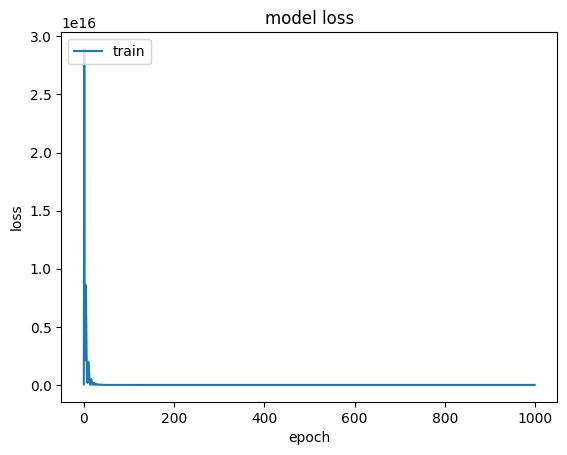

In [110]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

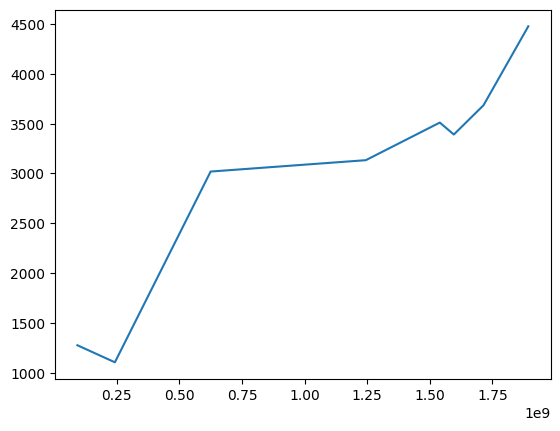

In [111]:
plt.plot(np.append(time, time_2030), np.append(speed, speed_2030))